### Import the libraries to show the EDA and clean the dataset

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load the dataset and explore its size and content

In [2]:
data = pd.read_csv("SampleSalesCar.csv",encoding='latin1')
df = data.copy()

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (23,31,37,40,96) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape

(184111, 289)

In [ ]:
df.info()

In [4]:
df.head(5)

,INT_ID,MKT_PACKAGE_C,BRANCH_C,CLASS_USE_C,RATES_AREA_C,POL_STATUS_C,PREV_CO_C,LEGAL_OWNER_I,LICENCE_C,TRAILER_I,...,source,occupation_grp,pay_method,telematics_i,ED_OSI_ID,Partnership,Scheme_Name,sale,sale_month,suspected
0,142028,CV,73,22,37,L,LL,Y,NaN,N,...,Non-EDI,Driving Profession,Standard,No,NaN,none,None,1,201503,N
1,0,IF,60,5,20,L,PI,Y,NaN,N,...,Pure Online,Homemaker + Unemployed,Standard,No,197034.0,none,None,1,201908,N
2,0,BF,33,6,10,L,OT,Y,NaN,N,...,SuperValu,"Professional, Associate Professional + Technician",Standard,No,77102.0,none,None,1,201904,N
3,0,IF,17,5,49,L,CG,Y,NaN,N,...,Hybrid,Homemaker + Unemployed,Standard,No,147035.0,none,None,1,201903,N
4,136556,FF,71,6,10,L,HI,Y,NaN,N,...,Relay,"Professional, Associate Professional + Technician",Standard,Unknown,77025.0,none,None,1,202001,N


### Have an initial report of the dataset using Sweetviz package

In [5]:
#my_initial_report = sv.analyze(df, pairwise_analysis = 'on')

In [6]:
#my_initial_report.show_html()

In [7]:
#profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True, correlations={
       #"pearson": {"calculate": True},
        #"spearman": {"calculate": False},
        #"kendall": {"calculate": False},
        #"phi_k": {"calculate": False},
        #"cramers": {"calculate": False},
    #},
#)

In [8]:
#profile.to_file("initial_report.html")

### Some Exploratory Data Analysis (EDA) from the dataset

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


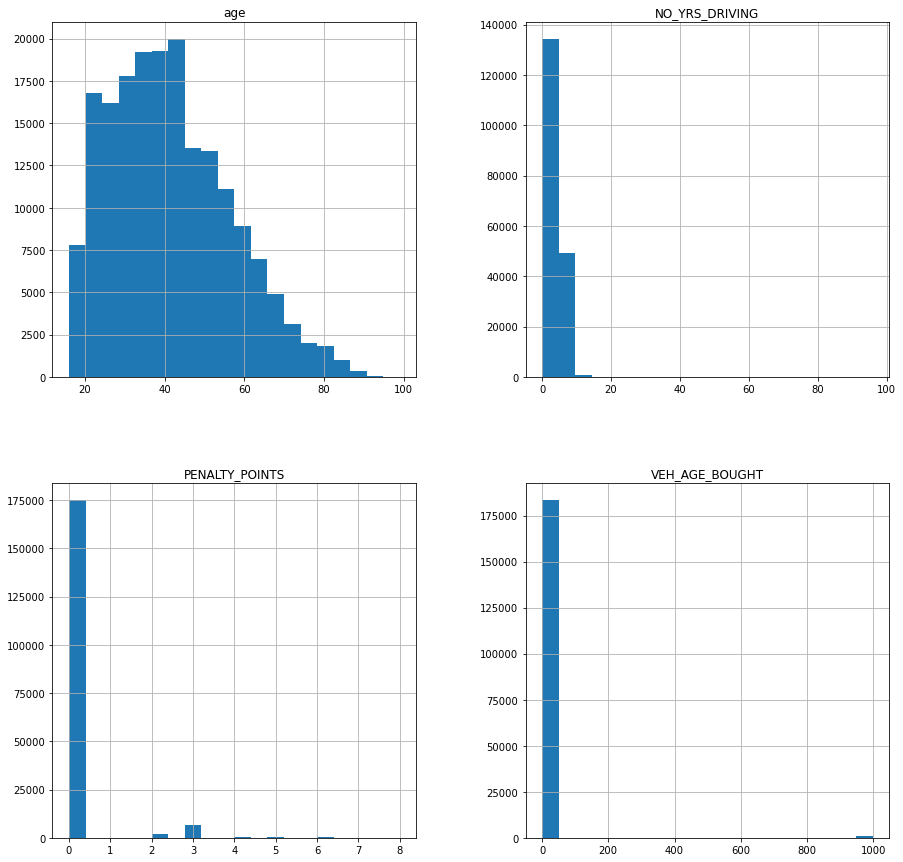

In [9]:
df[['age','NO_YRS_DRIVING','PENALTY_POINTS','VEH_AGE_BOUGHT','suspected']].hist(bins=20,figsize=(15, 15))
plt.show()

In [10]:
y = df.groupby("suspected")["age", "NO_YRS_DRIVING", "PENALTY_POINTS", "VEH_AGE_BOUGHT"].agg([np.mean, np.median])
y

<ipython-input-10-09937dcb6ba6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y = df.groupby("suspected")["age", "NO_YRS_DRIVING", "PENALTY_POINTS", "VEH_AGE_BOUGHT"].agg([np.mean, np.median])


age        NO_YRS_DRIVING        PENALTY_POINTS         \
                mean median           mean median           mean median   
suspected                                                                 
N          41.561219     39       1.795592      0       0.146936      0   
Y          36.586957     36       3.065217      4       0.097826      0   

          VEH_AGE_BOUGHT         
                    mean median  
suspected                        
N               8.530337    2.0  
Y               7.315217    8.5

In [11]:
df.groupby(['GENDER_C', 'VEH_MAKE_DESC_L', 'suspected']).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

suspected                   N    Y
GENDER_C VEH_MAKE_DESC_L          
C        DAF              1.0  0.0
         FORD             1.0  0.0
         JOHN DEERE       1.0  0.0
         M.A.N.           1.0  0.0
         MERCEDES         1.0  0.0
...                       ...  ...
M        VOLVO            1.0  0.0
         Volkswagen       1.0  0.0
         WOLSELEY         1.0  0.0
         YAMAHA           1.0  0.0
         ZETOR            1.0  0.0

[255 rows x 2 columns]

In [12]:
df['suspected'].value_counts()

N    184019
Y        92
Name: suspected, dtype: int64

In [13]:
x = pd.crosstab(df["GENDER_C"], df['suspected'])
x

suspected,N,Y
GENDER_C,,
C,22,0
F,73154,24
M,110843,68


C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


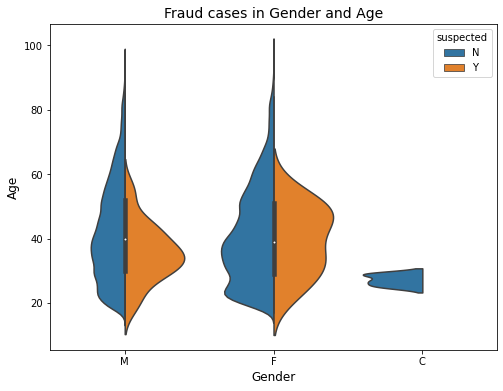

In [14]:
plt.figure(figsize=(8, 6))
a = sns.violinplot(df.GENDER_C, df.age, hue=df.suspected, split=True)
plt.title("Fraud cases in Gender and Age", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.show()

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


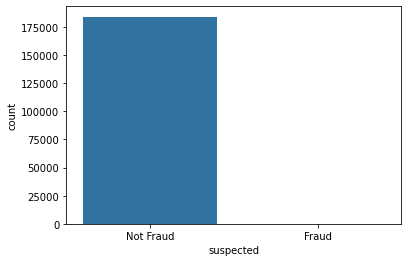

In [15]:
# visualize the target variable
g = sns.countplot(df['suspected'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

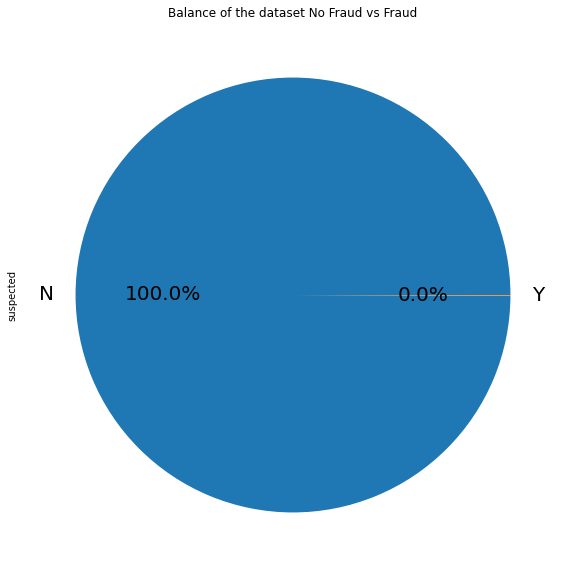

In [16]:
balance = df.suspected.value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%',
                                           title='Balance of the dataset No Fraud vs Fraud', 
                                           fontsize='20',) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'MF'),
  Text(1, 0, 'IF'),
  Text(2, 0, 'BF'),
  Text(3, 0, 'PR'),
  Text(4, 0, 'ST'),
  Text(5, 0, 'LF'),
  Text(6, 0, 'FF'),
  Text(7, 0, 'TF'),
  Text(8, 0, 'DF'),
  Text(9, 0, 'IS'),
  Text(10, 0, 'FA'),
  Text(11, 0, 'CV'),
  Text(12, 0, 'SD'),
  Text(13, 0, 'ER'),
  Text(14, 0, 'EF')])

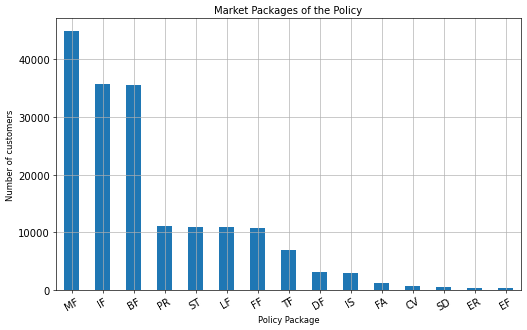

In [17]:
plt.figure(figsize=(10,6), dpi=60)
df.MKT_PACKAGE_C.value_counts().plot.bar(fontsize='12').grid(True)
plt.title("Market Packages of the Policy", fontsize='12')
plt.xlabel('Policy Package', fontsize='10' )
plt.ylabel('Number of customers', fontsize='10')
plt.xticks(rotation=30)

### Convert the independent variable in numeric and delete all variables with unique values

In [28]:
df['suspected'] = df['suspected'].replace({"Y": 1, "N": 0})

In [30]:
df.suspected = df.suspected.astype(int)

In [31]:
unicas = df.columns[df.nunique() <= 1]

In [32]:
unicas

Index(['POL_STATUS_C', 'NI_REGION_C', 'NO_MECH_FLTS', 'NO_CALL_OUT',
       'OVERNIGHT_LOC_C', 'GARAGED_I', 'dr3_main_drive_i', 'dr4_main_drive_i',
       'dr5_main_drive_i', 'dr6_prov_i', 'dr6_penalty_points', 'dr7_spouse_c',
       'dr7_main_drive_i', 'dr7_penalty_points', 'dr8_prov_i', 'dr8_spouse_c',
       'dr8_main_drive_i', 'dr8_penalty_points', 'dr9_prov_i', 'dr9_spouse_c',
       'dr9_main_drive_i', 'dr9_penalty_points', 'MATCH_LEVEL', 'CREDIT_SCORE',
       'MONTHS_AT_ADDR', 'CCJ_LAST_6', 'CCJ_LAST_7_12', 'CCJ_LAST_13_24',
       'NO_NOTSAMESUR', 'dfap_c', 'extra_ben_c', 'vol_ad_xs_a', 'pol_dur',
       'rep_key_i', 'med_exp_i', 'ent_cover_i', 'sale'],
      dtype='object')

In [33]:
df.POL_STATUS_C.value_counts()

L    184111
Name: POL_STATUS_C, dtype: int64

In [34]:
df.NO_MECH_FLTS.value_counts()

0    184111
Name: NO_MECH_FLTS, dtype: int64

In [35]:
for var in unicas:
    print(var)
    df = df.drop(var, axis=1)

POL_STATUS_C
NI_REGION_C
NO_MECH_FLTS
NO_CALL_OUT
OVERNIGHT_LOC_C
GARAGED_I
dr3_main_drive_i
dr4_main_drive_i
dr5_main_drive_i
dr6_prov_i
dr6_penalty_points
dr7_spouse_c
dr7_main_drive_i
dr7_penalty_points
dr8_prov_i
dr8_spouse_c
dr8_main_drive_i
dr8_penalty_points
dr9_prov_i
dr9_spouse_c
dr9_main_drive_i
dr9_penalty_points
MATCH_LEVEL
CREDIT_SCORE
MONTHS_AT_ADDR
CCJ_LAST_6
CCJ_LAST_7_12
CCJ_LAST_13_24
NO_NOTSAMESUR
dfap_c
extra_ben_c
vol_ad_xs_a
pol_dur
rep_key_i
med_exp_i
ent_cover_i
sale


### Check the current quantity of missing values

In [36]:
df.isnull().sum().sum()

11635782

### Check the types of variables in the dataset

In [37]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

INT_ID                  int64
MKT_PACKAGE_C          object
BRANCH_C                int64
CLASS_USE_C             int64
RATES_AREA_C            int64
PREV_CO_C              object
LEGAL_OWNER_I          object
LICENCE_C              object
TRAILER_I              object
PROV_I                 object
MAIN_DRIVE_I           object
INSURED_EXCL_I         object
lst_renew_d             int64
incept_d                int64
PENALTY_POINTS          int64
NO_DRIVERS              int64
LIC_ISSUE_D           float64
LIC_ISSUE_C            object
NO_YRS_DRIVING          int64
NO_YRS_NAMED            int64
PAY_METHOD_C           object
DRV_TRAINING_C         object
LIC_EXPIRY_D           object
PENALTY_EFF_D         float64
NCD_COUNTRY_C          object
AA_MEMBER_DUR           int64
AA_MEMBER_I            object
AA_CALLOUT_NUM          int64
BROKER_START_D        float64
BIRTH_D               float64
post_code              object
GENDER_C               object
OCCUP_C                object
CREDIT_RAT

### Delete all the Date Variables

In [38]:
drop_date_columns = ['lst_renew_d','incept_d','LIC_ISSUE_D','LIC_EXPIRY_D','PENALTY_EFF_D','BROKER_START_D','BIRTH_D',
                     'PURCHASE_D','FIRST_REGST_D','FIRST_REG_IRE_D','LAST_SALE_D','VEH_NCT_PASS_D','RI_PURCHASE_D',
                     'dr1_birth_d','dr2_birth_d','dr3_birth_d','dr4_birth_d','dr5_birth_d','dr6_birth_d','dr7_birth_d',
                     'dr8_birth_d','dr9_birth_d','inception_d','incept_date','lst_renew_date','VEH_TAX_EXPIRY','VEH_NCT_EXPIRY']

In [39]:
df = df.drop(drop_date_columns, axis=1)

In [40]:
df.shape

(184111, 225)

### Delete all the variables correlated

In [41]:
corr_matrix = df.corr().abs()

In [42]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

<ipython-input-42-c1ad37c011f5>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [43]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [44]:
for item in to_drop:
    print(item)
    df = df.drop(item, axis=1)

dr9_age
agg_smoothness_p
RATING_AREA_C
ABI_CUBCAP
inception_y
inception_m
makemodeltype
gross_veh_rate
value_band
ED_OSI_ID
sale_month


### See the percentage of missing values in each variable

In [45]:
df.isnull().sum().sum()

8499510

In [46]:
missing_values = ((df.isnull().sum()/184111)*100)

In [47]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    missing_values_per = round(missing_values, 2)
    print(missing_values_per)

INT_ID                 0.00
MKT_PACKAGE_C          4.51
BRANCH_C               0.00
CLASS_USE_C            0.00
RATES_AREA_C           0.00
PREV_CO_C              0.00
LEGAL_OWNER_I          0.00
LICENCE_C             98.18
TRAILER_I              0.00
PROV_I                 0.00
MAIN_DRIVE_I           0.00
INSURED_EXCL_I         0.00
PENALTY_POINTS         0.00
NO_DRIVERS             0.00
LIC_ISSUE_C            5.30
NO_YRS_DRIVING         0.00
NO_YRS_NAMED           0.00
PAY_METHOD_C          63.18
DRV_TRAINING_C        17.25
NCD_COUNTRY_C         52.18
AA_MEMBER_DUR          0.00
AA_MEMBER_I           64.04
AA_CALLOUT_NUM         0.00
post_code             99.99
GENDER_C               0.00
OCCUP_C                0.01
CREDIT_RATING_C        0.00
MARTL_STAT_C          71.70
CHILDREN_U16           0.00
CITY_C                51.72
SECTOR_C              70.38
STREET_SIDE_C         99.99
ABI_OCCUP_C           19.89
PT_ABI_OCCUP_C        96.69
EMPLOYMENT_C          53.28
RESIDENCY_DUR       

### Delete all the variables with missing values greater than 90%

In [48]:
limitPer = len(missing_values_per) * 90.00
df = df.dropna(thresh=limitPer, axis=1)

In [49]:
missing_values = ((df.isnull().sum()/184111)*100)

In [50]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    missing_values_per = round(missing_values, 2)
    print(missing_values_per)
    

INT_ID                 0.00
MKT_PACKAGE_C          4.51
BRANCH_C               0.00
CLASS_USE_C            0.00
RATES_AREA_C           0.00
PREV_CO_C              0.00
LEGAL_OWNER_I          0.00
TRAILER_I              0.00
PROV_I                 0.00
MAIN_DRIVE_I           0.00
INSURED_EXCL_I         0.00
PENALTY_POINTS         0.00
NO_DRIVERS             0.00
LIC_ISSUE_C            5.30
NO_YRS_DRIVING         0.00
NO_YRS_NAMED           0.00
PAY_METHOD_C          63.18
DRV_TRAINING_C        17.25
NCD_COUNTRY_C         52.18
AA_MEMBER_DUR          0.00
AA_MEMBER_I           64.04
AA_CALLOUT_NUM         0.00
GENDER_C               0.00
OCCUP_C                0.01
CREDIT_RATING_C        0.00
MARTL_STAT_C          71.70
CHILDREN_U16           0.00
CITY_C                51.72
SECTOR_C              70.38
ABI_OCCUP_C           19.89
EMPLOYMENT_C          53.28
RESIDENCY_DUR          0.00
ABI_AREA_C            16.28
COVER_C                0.00
OPEN_DRV_C             0.00
CLM_FREE_YRS        

### Check again the types of variables in the dataset

In [51]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

INT_ID                  int64
MKT_PACKAGE_C          object
BRANCH_C                int64
CLASS_USE_C             int64
RATES_AREA_C            int64
PREV_CO_C              object
LEGAL_OWNER_I          object
TRAILER_I              object
PROV_I                 object
MAIN_DRIVE_I           object
INSURED_EXCL_I         object
PENALTY_POINTS          int64
NO_DRIVERS              int64
LIC_ISSUE_C            object
NO_YRS_DRIVING          int64
NO_YRS_NAMED            int64
PAY_METHOD_C           object
DRV_TRAINING_C         object
NCD_COUNTRY_C          object
AA_MEMBER_DUR           int64
AA_MEMBER_I            object
AA_CALLOUT_NUM          int64
GENDER_C               object
OCCUP_C                object
CREDIT_RATING_C        object
MARTL_STAT_C           object
CHILDREN_U16          float64
CITY_C                float64
SECTOR_C              float64
ABI_OCCUP_C            object
EMPLOYMENT_C           object
RESIDENCY_DUR         float64
ABI_AREA_C             object
COVER_C   

### Assign categorical values to those variables that must be categorical

In [52]:
categorical = ['INT_ID', 'BRANCH_C', 'CLASS_USE_C','RATES_AREA_C','CITY_C','SECTOR_C','BONUS_TYPE_C',
   'EPAY_SCHEME_C','AXA_VEH_SEG_C','VEH_CLUSTER_C','VEH_MAKE_C','VEH_MODEL_C','VEH_TYPE_C',
   'veh_group_i','VEH_RISK_TYPE_C','ABI_MKM_C','LEG_OWNER_REL_C','REG_OWNER_REL_C','SMALL_AREA_C',
   'UW_SCORE_C','R_SMALL_AREA_C','FLOOD_SCORE_C','Multi_Int_ID','PBI_I',
   'PBI_TYPE_C','co_id','veh_year','renewal_year','renewal_month']

In [53]:
for col in categorical:
    df[col] = df[col].astype('object',copy=False)

In [54]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

INT_ID                 object
MKT_PACKAGE_C          object
BRANCH_C               object
CLASS_USE_C            object
RATES_AREA_C           object
PREV_CO_C              object
LEGAL_OWNER_I          object
TRAILER_I              object
PROV_I                 object
MAIN_DRIVE_I           object
INSURED_EXCL_I         object
PENALTY_POINTS          int64
NO_DRIVERS              int64
LIC_ISSUE_C            object
NO_YRS_DRIVING          int64
NO_YRS_NAMED            int64
PAY_METHOD_C           object
DRV_TRAINING_C         object
NCD_COUNTRY_C          object
AA_MEMBER_DUR           int64
AA_MEMBER_I            object
AA_CALLOUT_NUM          int64
GENDER_C               object
OCCUP_C                object
CREDIT_RATING_C        object
MARTL_STAT_C           object
CHILDREN_U16          float64
CITY_C                 object
SECTOR_C               object
ABI_OCCUP_C            object
EMPLOYMENT_C           object
RESIDENCY_DUR         float64
ABI_AREA_C             object
COVER_C   

### Save the numeric variables in "features"

In [55]:
features = []
for c in df.columns:
    t = str(df[c].dtype)
    if "int" in t or "float" in t:
        features.append(c)
features

['PENALTY_POINTS',
 'NO_DRIVERS',
 'NO_YRS_DRIVING',
 'NO_YRS_NAMED',
 'AA_MEMBER_DUR',
 'AA_CALLOUT_NUM',
 'CHILDREN_U16',
 'RESIDENCY_DUR',
 'CLM_FREE_YRS',
 'TP_XS_A',
 'AD_XS_A',
 'VOL_XS_A',
 'CUBCAP',
 'NO_SEATS',
 'ANNUAL_MILEAGE',
 'VEH_VALUE_A',
 'NO_PREV_OWNR',
 'NO_COLOUR_CHG',
 'INVOICE_VALUE_A',
 'VEH_ACCL',
 'RI_CUBCAP',
 'VEH_AGE_BOUGHT',
 'dr1_age',
 'dr1_penalty_points',
 'dr2_age',
 'dr3_age',
 'dr4_age',
 'dr5_age',
 'dr6_age',
 'dr7_age',
 'dr8_age',
 'TPD_NCD_A',
 'X_COORDINATE',
 'Y_COORDINATE',
 'ABI_VEH_HGT',
 'ABI_ZERO_SIXTY',
 'CUBCAP_RATE',
 'age',
 'veh_age',
 'carry_capacity',
 'suspected']

### Save the categorical variables in "features_character"

In [56]:
features_character = []
for c in df.columns:
    t = str(df[c].dtype)
    if "object" in t:
        features_character.append(c)
features_character

['INT_ID',
 'MKT_PACKAGE_C',
 'BRANCH_C',
 'CLASS_USE_C',
 'RATES_AREA_C',
 'PREV_CO_C',
 'LEGAL_OWNER_I',
 'TRAILER_I',
 'PROV_I',
 'MAIN_DRIVE_I',
 'INSURED_EXCL_I',
 'LIC_ISSUE_C',
 'PAY_METHOD_C',
 'DRV_TRAINING_C',
 'NCD_COUNTRY_C',
 'AA_MEMBER_I',
 'GENDER_C',
 'OCCUP_C',
 'CREDIT_RATING_C',
 'MARTL_STAT_C',
 'CITY_C',
 'SECTOR_C',
 'ABI_OCCUP_C',
 'EMPLOYMENT_C',
 'ABI_AREA_C',
 'COVER_C',
 'OPEN_DRV_C',
 'NCD_C',
 'DRV_OTH_CAR_I',
 'BONUS_TYPE_C',
 'VEH_NEWFOROLD_I',
 'NPI_I',
 'BROKER_SCHEME_C',
 'EPAY_SCHEME_C',
 'PROMOTION_C',
 'HOME_OWNER_I',
 'UKROI_IMPORT_C',
 'EXEC_I',
 'AXA_VEH_SEG_C',
 'VEH_BODY_TYPE',
 'VEH_COLOUR',
 'VEH_TAX_CLASS',
 'VEH_STATUS_C',
 'CTRY_ORIGIN',
 'TAX_STATUS_C',
 'NCT_STATUS_C',
 'DAMAGED_I',
 'BYND_ECON_REP_I',
 'CURR_TAXI_I',
 'CURR_HACKNEY_I',
 'CURR_COM_I',
 'CURR_TAX_I',
 'CURR_NCT_I',
 'CURR_PRIVATE_I',
 'VEH_CLUSTER_C',
 'VEH_MAKE_C',
 'VEH_MODEL_C',
 'VEH_MODIFIED_I',
 'VEH_TYPE_C',
 'veh_group_i',
 'VEH_REG_STATUS',
 'VEH_TRANSMIS',
 'VEH

### Update the percentage of missing values

In [57]:
missing_values = ((df.isnull().sum()/184111)*100)

In [58]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    missing_values_per = round(missing_values, 2)
    print(missing_values_per)

INT_ID                 0.00
MKT_PACKAGE_C          4.51
BRANCH_C               0.00
CLASS_USE_C            0.00
RATES_AREA_C           0.00
PREV_CO_C              0.00
LEGAL_OWNER_I          0.00
TRAILER_I              0.00
PROV_I                 0.00
MAIN_DRIVE_I           0.00
INSURED_EXCL_I         0.00
PENALTY_POINTS         0.00
NO_DRIVERS             0.00
LIC_ISSUE_C            5.30
NO_YRS_DRIVING         0.00
NO_YRS_NAMED           0.00
PAY_METHOD_C          63.18
DRV_TRAINING_C        17.25
NCD_COUNTRY_C         52.18
AA_MEMBER_DUR          0.00
AA_MEMBER_I           64.04
AA_CALLOUT_NUM         0.00
GENDER_C               0.00
OCCUP_C                0.01
CREDIT_RATING_C        0.00
MARTL_STAT_C          71.70
CHILDREN_U16           0.00
CITY_C                51.72
SECTOR_C              70.38
ABI_OCCUP_C           19.89
EMPLOYMENT_C          53.28
RESIDENCY_DUR          0.00
ABI_AREA_C            16.28
COVER_C                0.00
OPEN_DRV_C             0.00
CLM_FREE_YRS        

### Fill the missing values of categorical values with "X"

In [59]:
for var in features_character:
    df[var] = df[var].fillna("X")
    print(var, df[var].isnull().sum())

INT_ID 0
MKT_PACKAGE_C 0
BRANCH_C 0
CLASS_USE_C 0
RATES_AREA_C 0
PREV_CO_C 0
LEGAL_OWNER_I 0
TRAILER_I 0
PROV_I 0
MAIN_DRIVE_I 0
INSURED_EXCL_I 0
LIC_ISSUE_C 0
PAY_METHOD_C 0
DRV_TRAINING_C 0
NCD_COUNTRY_C 0
AA_MEMBER_I 0
GENDER_C 0
OCCUP_C 0
CREDIT_RATING_C 0
MARTL_STAT_C 0
CITY_C 0
SECTOR_C 0
ABI_OCCUP_C 0
EMPLOYMENT_C 0
ABI_AREA_C 0
COVER_C 0
OPEN_DRV_C 0
NCD_C 0
DRV_OTH_CAR_I 0
BONUS_TYPE_C 0
VEH_NEWFOROLD_I 0
NPI_I 0
BROKER_SCHEME_C 0
EPAY_SCHEME_C 0
PROMOTION_C 0
HOME_OWNER_I 0
UKROI_IMPORT_C 0
EXEC_I 0
AXA_VEH_SEG_C 0
VEH_BODY_TYPE 0
VEH_COLOUR 0
VEH_TAX_CLASS 0
VEH_STATUS_C 0
CTRY_ORIGIN 0
TAX_STATUS_C 0
NCT_STATUS_C 0
DAMAGED_I 0
BYND_ECON_REP_I 0
CURR_TAXI_I 0
CURR_HACKNEY_I 0
CURR_COM_I 0
CURR_TAX_I 0
CURR_NCT_I 0
CURR_PRIVATE_I 0
VEH_CLUSTER_C 0
VEH_MAKE_C 0
VEH_MODEL_C 0
VEH_MODIFIED_I 0
VEH_TYPE_C 0
veh_group_i 0
VEH_REG_STATUS 0
VEH_TRANSMIS 0
VEH_RISK_TYPE_C 0
ABI_MKM_C 0
ABI_NUM_DOORS 0
FUEL_TYPE_C 0
ALARM_C 0
LEG_OWNER_REL_C 0
REG_OWNER_REL_C 0
LEFT_HAND_DRV_I 0
ADAPT

In [60]:
missing_values = ((df.isnull().sum()/184111)*100)

In [61]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    missing_values_per = round(missing_values, 2)
    print(missing_values_per)

INT_ID                 0.00
MKT_PACKAGE_C          0.00
BRANCH_C               0.00
CLASS_USE_C            0.00
RATES_AREA_C           0.00
PREV_CO_C              0.00
LEGAL_OWNER_I          0.00
TRAILER_I              0.00
PROV_I                 0.00
MAIN_DRIVE_I           0.00
INSURED_EXCL_I         0.00
PENALTY_POINTS         0.00
NO_DRIVERS             0.00
LIC_ISSUE_C            0.00
NO_YRS_DRIVING         0.00
NO_YRS_NAMED           0.00
PAY_METHOD_C           0.00
DRV_TRAINING_C         0.00
NCD_COUNTRY_C          0.00
AA_MEMBER_DUR          0.00
AA_MEMBER_I            0.00
AA_CALLOUT_NUM         0.00
GENDER_C               0.00
OCCUP_C                0.00
CREDIT_RATING_C        0.00
MARTL_STAT_C           0.00
CHILDREN_U16           0.00
CITY_C                 0.00
SECTOR_C               0.00
ABI_OCCUP_C            0.00
EMPLOYMENT_C           0.00
RESIDENCY_DUR          0.00
ABI_AREA_C             0.00
COVER_C                0.00
OPEN_DRV_C             0.00
CLM_FREE_YRS        

### Fill the missing values of numeric values with -9999, mean or drop the variables

In [62]:
df['TPD_NCD_A'].fillna(-9999,inplace=True)

In [63]:
df['dr1_penalty_points'].fillna((df['dr1_penalty_points'].mean()), inplace=True)

In [64]:
df = df.drop(['X_COORDINATE'], axis=1)

In [65]:
df = df.drop(['Y_COORDINATE'], axis=1)

In [66]:
df['ABI_VEH_HGT'].fillna((df['ABI_VEH_HGT'].mean()), inplace=True)

In [67]:
df['ABI_ZERO_SIXTY'].fillna((df['ABI_ZERO_SIXTY'].mean()), inplace=True)

In [68]:
df['carry_capacity'].fillna((df['carry_capacity'].mean()), inplace=True)

### Check once again the percentage of missing values and number of missing values of each variable

In [69]:
missing_values = ((df.isnull().sum()/184111)*100)

In [70]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    missing_values_per = round(missing_values, 2)
    print(missing_values_per)

INT_ID                0.0
MKT_PACKAGE_C         0.0
BRANCH_C              0.0
CLASS_USE_C           0.0
RATES_AREA_C          0.0
PREV_CO_C             0.0
LEGAL_OWNER_I         0.0
TRAILER_I             0.0
PROV_I                0.0
MAIN_DRIVE_I          0.0
INSURED_EXCL_I        0.0
PENALTY_POINTS        0.0
NO_DRIVERS            0.0
LIC_ISSUE_C           0.0
NO_YRS_DRIVING        0.0
NO_YRS_NAMED          0.0
PAY_METHOD_C          0.0
DRV_TRAINING_C        0.0
NCD_COUNTRY_C         0.0
AA_MEMBER_DUR         0.0
AA_MEMBER_I           0.0
AA_CALLOUT_NUM        0.0
GENDER_C              0.0
OCCUP_C               0.0
CREDIT_RATING_C       0.0
MARTL_STAT_C          0.0
CHILDREN_U16          0.0
CITY_C                0.0
SECTOR_C              0.0
ABI_OCCUP_C           0.0
EMPLOYMENT_C          0.0
RESIDENCY_DUR         0.0
ABI_AREA_C            0.0
COVER_C               0.0
OPEN_DRV_C            0.0
CLM_FREE_YRS          0.0
NCD_C                 0.0
DRV_OTH_CAR_I         0.0
TP_XS_A     

In [71]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.isnull().sum())

INT_ID                0
MKT_PACKAGE_C         0
BRANCH_C              0
CLASS_USE_C           0
RATES_AREA_C          0
PREV_CO_C             0
LEGAL_OWNER_I         0
TRAILER_I             0
PROV_I                0
MAIN_DRIVE_I          0
INSURED_EXCL_I        0
PENALTY_POINTS        0
NO_DRIVERS            0
LIC_ISSUE_C           0
NO_YRS_DRIVING        0
NO_YRS_NAMED          0
PAY_METHOD_C          0
DRV_TRAINING_C        0
NCD_COUNTRY_C         0
AA_MEMBER_DUR         0
AA_MEMBER_I           0
AA_CALLOUT_NUM        0
GENDER_C              0
OCCUP_C               0
CREDIT_RATING_C       0
MARTL_STAT_C          0
CHILDREN_U16          1
CITY_C                0
SECTOR_C              0
ABI_OCCUP_C           0
EMPLOYMENT_C          0
RESIDENCY_DUR         1
ABI_AREA_C            0
COVER_C               0
OPEN_DRV_C            0
CLM_FREE_YRS          0
NCD_C                 0
DRV_OTH_CAR_I         0
TP_XS_A               0
AD_XS_A               0
VOL_XS_A              0
BONUS_TYPE_C    

In [72]:
df.isnull().sum().sum()

2

In [73]:
df.CHILDREN_U16.value_counts()

0.0     100331
99.0     83453
1.0        124
2.0        105
3.0         66
4.0         17
5.0         10
11.0         1
38.0         1
36.0         1
6.0          1
Name: CHILDREN_U16, dtype: int64

In [74]:
df['CHILDREN_U16'].replace({38:99}, inplace=True)

In [75]:
df['CHILDREN_U16'].replace({36:99}, inplace=True)

In [76]:
df['CHILDREN_U16'].fillna(99,inplace=True)

In [77]:
df.CHILDREN_U16.value_counts()

0.0     100331
99.0     83456
1.0        124
2.0        105
3.0         66
4.0         17
5.0         10
11.0         1
6.0          1
Name: CHILDREN_U16, dtype: int64

In [78]:
df.RESIDENCY_DUR.value_counts()

0.0     94036
4.0     12000
3.0     10313
99.0     2192
22.0     1570
        ...  
92.0        8
91.0        7
90.0        4
94.0        1
93.0        1
Name: RESIDENCY_DUR, Length: 96, dtype: int64

In [79]:
df['RESIDENCY_DUR'].fillna((df['RESIDENCY_DUR'].mean()), inplace=True)

In [80]:
df.isnull().sum().sum()

0

In [81]:
for col in categorical:
    df[col] = df[col].astype('object',copy=False)

In [82]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

INT_ID                 object
MKT_PACKAGE_C          object
BRANCH_C               object
CLASS_USE_C            object
RATES_AREA_C           object
PREV_CO_C              object
LEGAL_OWNER_I          object
TRAILER_I              object
PROV_I                 object
MAIN_DRIVE_I           object
INSURED_EXCL_I         object
PENALTY_POINTS          int64
NO_DRIVERS              int64
LIC_ISSUE_C            object
NO_YRS_DRIVING          int64
NO_YRS_NAMED            int64
PAY_METHOD_C           object
DRV_TRAINING_C         object
NCD_COUNTRY_C          object
AA_MEMBER_DUR           int64
AA_MEMBER_I            object
AA_CALLOUT_NUM          int64
GENDER_C               object
OCCUP_C                object
CREDIT_RATING_C        object
MARTL_STAT_C           object
CHILDREN_U16          float64
CITY_C                 object
SECTOR_C               object
ABI_OCCUP_C            object
EMPLOYMENT_C           object
RESIDENCY_DUR         float64
ABI_AREA_C             object
COVER_C   

### Delete those variables with more than 10 different values

In [83]:
for i in df:
    if df[i].nunique() > 10:
        print(df[i].name)
        df = df.drop(df[i].name, axis = 1)

INT_ID
MKT_PACKAGE_C
BRANCH_C
CLASS_USE_C
RATES_AREA_C
PREV_CO_C
LIC_ISSUE_C
NO_YRS_DRIVING
NO_YRS_NAMED
DRV_TRAINING_C
NCD_COUNTRY_C
AA_MEMBER_DUR
AA_CALLOUT_NUM
OCCUP_C
CITY_C
ABI_OCCUP_C
RESIDENCY_DUR
ABI_AREA_C
CLM_FREE_YRS
AD_XS_A
EPAY_SCHEME_C
PROMOTION_C
CUBCAP
NO_SEATS
ANNUAL_MILEAGE
AXA_VEH_SEG_C
VEH_BODY_TYPE
VEH_COLOUR
VEH_VALUE_A
NO_PREV_OWNR
CTRY_ORIGIN
VEH_MAKE_C
VEH_MODEL_C
VEH_TYPE_C
veh_group_i
VEH_RISK_TYPE_C
ABI_MKM_C
INVOICE_VALUE_A
VEH_ACCL
RI_CUBCAP
VEH_AGE_BOUGHT
dr1_age
dr1_occup_c
dr2_age
dr2_occup_c
dr3_age
dr3_occup_c
dr4_age
dr4_occup_c
dr5_age
dr5_occup_c
dr6_age
dr6_occup_c
windscreen_i
TPD_NCD_A
SMALL_AREA_C
R_SMALL_AREA_C
EIRCODE
VEH_MAKE_DESC_L
VEH_MOD_DESC_L
ABI_VEH_HGT
ABI_ZERO_SIXTY
CUBCAP_RATE
INCEPT_USER
Multi_Int_ID
PBI_TYPE_C
age
veh_year
renewal_month
reg_year
veh_age
area
area_region
age_group
carry_capacity
cc_group
veh_grp_band
segment
occupation_grp
Scheme_Name


In [84]:
len(df.columns)

113

### Separate the categorical variables from the numeric variables in the dataset 

In [85]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [86]:
categoricals = df.select_dtypes(exclude=numerics)

In [87]:
categoricals = categorical.replace(' ', '_')

In [88]:
columnas = categoricals.columns

In [89]:
categoricals.columns

Index(['LEGAL_OWNER_I', 'TRAILER_I', 'PROV_I', 'MAIN_DRIVE_I',
       'INSURED_EXCL_I', 'PAY_METHOD_C', 'AA_MEMBER_I', 'GENDER_C',
       'CREDIT_RATING_C', 'MARTL_STAT_C',
       ...
       'drvtyp', 'lic_region', 'multiproduct_i', 'pol_type', 'warehouse',
       'channel', 'source', 'pay_method', 'telematics_i', 'Partnership'],
      dtype='object', length=103)

In [90]:
columnas

Index(['LEGAL_OWNER_I', 'TRAILER_I', 'PROV_I', 'MAIN_DRIVE_I',
       'INSURED_EXCL_I', 'PAY_METHOD_C', 'AA_MEMBER_I', 'GENDER_C',
       'CREDIT_RATING_C', 'MARTL_STAT_C',
       ...
       'drvtyp', 'lic_region', 'multiproduct_i', 'pol_type', 'warehouse',
       'channel', 'source', 'pay_method', 'telematics_i', 'Partnership'],
      dtype='object', length=103)

### Create a function to dumify the categorical variables, delete these variables from "categoricals" and from the dataset and concat the dumy variables in the dataset

In [91]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]], drop_first=True)
    res = pd.concat([original_dataframe, dummies], axis=1)
    #res = res.drop(feature_to_encode,axis = 1)
    return(res)

In [92]:
for i in range(0, len(columnas)):
    print(i, columnas[i])
    categoricals = encode_and_bind(categoricals, columnas[i])
    categoricals = categoricals.drop(columnas[i], axis = 1)

0 LEGAL_OWNER_I
1 TRAILER_I
2 PROV_I
3 MAIN_DRIVE_I
4 INSURED_EXCL_I
5 PAY_METHOD_C
6 AA_MEMBER_I
7 GENDER_C
8 CREDIT_RATING_C
9 MARTL_STAT_C
10 SECTOR_C
11 EMPLOYMENT_C
12 COVER_C
13 OPEN_DRV_C
14 NCD_C
15 DRV_OTH_CAR_I
16 BONUS_TYPE_C
17 VEH_NEWFOROLD_I
18 NPI_I
19 BROKER_SCHEME_C
20 HOME_OWNER_I
21 UKROI_IMPORT_C
22 EXEC_I
23 VEH_TAX_CLASS
24 VEH_STATUS_C
25 TAX_STATUS_C
26 NCT_STATUS_C
27 DAMAGED_I
28 BYND_ECON_REP_I
29 CURR_TAXI_I
30 CURR_HACKNEY_I
31 CURR_COM_I
32 CURR_TAX_I
33 CURR_NCT_I
34 CURR_PRIVATE_I
35 VEH_CLUSTER_C
36 VEH_MODIFIED_I
37 VEH_REG_STATUS
38 VEH_TRANSMIS
39 ABI_NUM_DOORS
40 FUEL_TYPE_C
41 ALARM_C
42 LEG_OWNER_REL_C
43 REG_OWNER_REL_C
44 LEFT_HAND_DRV_I
45 ADAPTED_I
46 IMPORT_C
47 VEH_TAX_CLASS_C
48 dr1_gender_c
49 dr1_prov_i
50 dr1_spouse_c
51 dr1_main_drive_i
52 dr2_gender_c
53 dr2_prov_i
54 dr2_spouse_c
55 dr2_main_drive_i
56 dr3_gender_c
57 dr3_prov_i
58 dr3_spouse_c
59 dr4_gender_c
60 dr4_prov_i
61 dr4_spouse_c
62 dr5_gender_c
63 dr5_prov_i
64 dr5_spouse_c

In [93]:
for i in range(0, len(columnas)):
    print(i, columnas[i])
    df = df.drop(columnas[i], axis = 1)

0 LEGAL_OWNER_I
1 TRAILER_I
2 PROV_I
3 MAIN_DRIVE_I
4 INSURED_EXCL_I
5 PAY_METHOD_C
6 AA_MEMBER_I
7 GENDER_C
8 CREDIT_RATING_C
9 MARTL_STAT_C
10 SECTOR_C
11 EMPLOYMENT_C
12 COVER_C
13 OPEN_DRV_C
14 NCD_C
15 DRV_OTH_CAR_I
16 BONUS_TYPE_C
17 VEH_NEWFOROLD_I
18 NPI_I
19 BROKER_SCHEME_C
20 HOME_OWNER_I
21 UKROI_IMPORT_C
22 EXEC_I
23 VEH_TAX_CLASS
24 VEH_STATUS_C
25 TAX_STATUS_C
26 NCT_STATUS_C
27 DAMAGED_I
28 BYND_ECON_REP_I
29 CURR_TAXI_I
30 CURR_HACKNEY_I
31 CURR_COM_I
32 CURR_TAX_I
33 CURR_NCT_I
34 CURR_PRIVATE_I
35 VEH_CLUSTER_C
36 VEH_MODIFIED_I
37 VEH_REG_STATUS
38 VEH_TRANSMIS
39 ABI_NUM_DOORS
40 FUEL_TYPE_C
41 ALARM_C
42 LEG_OWNER_REL_C
43 REG_OWNER_REL_C
44 LEFT_HAND_DRV_I
45 ADAPTED_I
46 IMPORT_C
47 VEH_TAX_CLASS_C
48 dr1_gender_c
49 dr1_prov_i
50 dr1_spouse_c
51 dr1_main_drive_i
52 dr2_gender_c
53 dr2_prov_i
54 dr2_spouse_c
55 dr2_main_drive_i
56 dr3_gender_c
57 dr3_prov_i
58 dr3_spouse_c
59 dr4_gender_c
60 dr4_prov_i
61 dr4_spouse_c
62 dr5_gender_c
63 dr5_prov_i
64 dr5_spouse_c

In [94]:
dffinal = pd.concat([df, categorical], axis=1)

In [95]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(dffinal.dtypes)

PENALTY_POINTS                       int64
NO_DRIVERS                           int64
CHILDREN_U16                       float64
TP_XS_A                              int64
VOL_XS_A                             int64
NO_COLOUR_CHG                        int64
dr1_penalty_points                 float64
dr7_age                              int64
dr8_age                              int64
suspected                            int32
LEGAL_OWNER_I_Y                      uint8
TRAILER_I_B                          uint8
TRAILER_I_E                          uint8
TRAILER_I_J                          uint8
TRAILER_I_N                          uint8
TRAILER_I_U                          uint8
TRAILER_I_Y                          uint8
PROV_I_Y                             uint8
MAIN_DRIVE_I_Y                       uint8
INSURED_EXCL_I_Y                     uint8
PAY_METHOD_C_SF                      uint8
PAY_METHOD_C_X                       uint8
AA_MEMBER_I_X                        uint8
AA_MEMBER_I

### Put the independent or target variable in the end of the dataset

In [99]:
df_temp = dffinal.pop('suspected')

In [100]:
dffinal['fraud'] = df_temp

In [101]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(dffinal.dtypes)

PENALTY_POINTS                       int64
NO_DRIVERS                           int64
CHILDREN_U16                       float64
TP_XS_A                              int64
VOL_XS_A                             int64
NO_COLOUR_CHG                        int64
dr1_penalty_points                 float64
dr7_age                              int64
dr8_age                              int64
LEGAL_OWNER_I_Y                      uint8
TRAILER_I_B                          uint8
TRAILER_I_E                          uint8
TRAILER_I_J                          uint8
TRAILER_I_N                          uint8
TRAILER_I_U                          uint8
TRAILER_I_Y                          uint8
PROV_I_Y                             uint8
MAIN_DRIVE_I_Y                       uint8
INSURED_EXCL_I_Y                     uint8
PAY_METHOD_C_SF                      uint8
PAY_METHOD_C_X                       uint8
AA_MEMBER_I_X                        uint8
AA_MEMBER_I_Y                        uint8
GENDER_C_F 

### Delete again any correlated variables left

In [102]:
corr_matrix = dffinal.corr().abs()

In [103]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

<ipython-input-103-c1ad37c011f5>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [104]:
to_dropfinal = [column for column in upper.columns if any(upper[column] > 0.95)]

In [107]:
for item in to_dropfinal:
    print(item)
    dffinal = dffinal.drop(item, axis=1)

TRAILER_I_U
GENDER_C_M
MARTL_STAT_C_X
EMPLOYMENT_C_X
VEH_STATUS_C_X
TAX_STATUS_C_X
NCT_STATUS_C_Z
BYND_ECON_REP_I_X
CURR_TAXI_I_X
CURR_HACKNEY_I_X
CURR_COM_I_X
CURR_TAX_I_X
CURR_NCT_I_X
CURR_NCT_I_Z
VEH_MODIFIED_I_X
VEH_TRANSMIS_X
FUEL_TYPE_C_P
ALARM_C_X
LEG_OWNER_REL_C_X
REG_OWNER_REL_C_3.0
REG_OWNER_REL_C_6.0
REG_OWNER_REL_C_X
ADAPTED_I_X
IMPORT_C_X
dr7_gender_c_U
dr7_prov_i_Y
dr7_occup_c_OE
dr7_occup_c_ZZ
dr8_gender_c_M
dr8_gender_c_U
dr8_occup_c_VA
dr8_occup_c_ZZ
dr9_gender_c_M
dr9_gender_c_U
dr9_occup_c_MM
dr9_occup_c_ZZ
prot_ncd_i_Y
injury_N
car_hire_N
car_hire_X
res_open_Y
FLOOD_SCORE_C_1.0
FLOOD_SCORE_C_X
pol_type_IOD
warehouse_Internet
warehouse_Legacy
warehouse_Relay
warehouse_X
channel_Traditional
source_Legacy
source_Open GI
source_Pure Online
source_Relay
source_SuperValu
pay_method_PBI
pay_method_Standard
telematics_i_Unknown


### Plot the Correlation Matrix

In [108]:
correlation_mat = dffinal.corr()

<AxesSubplot:>

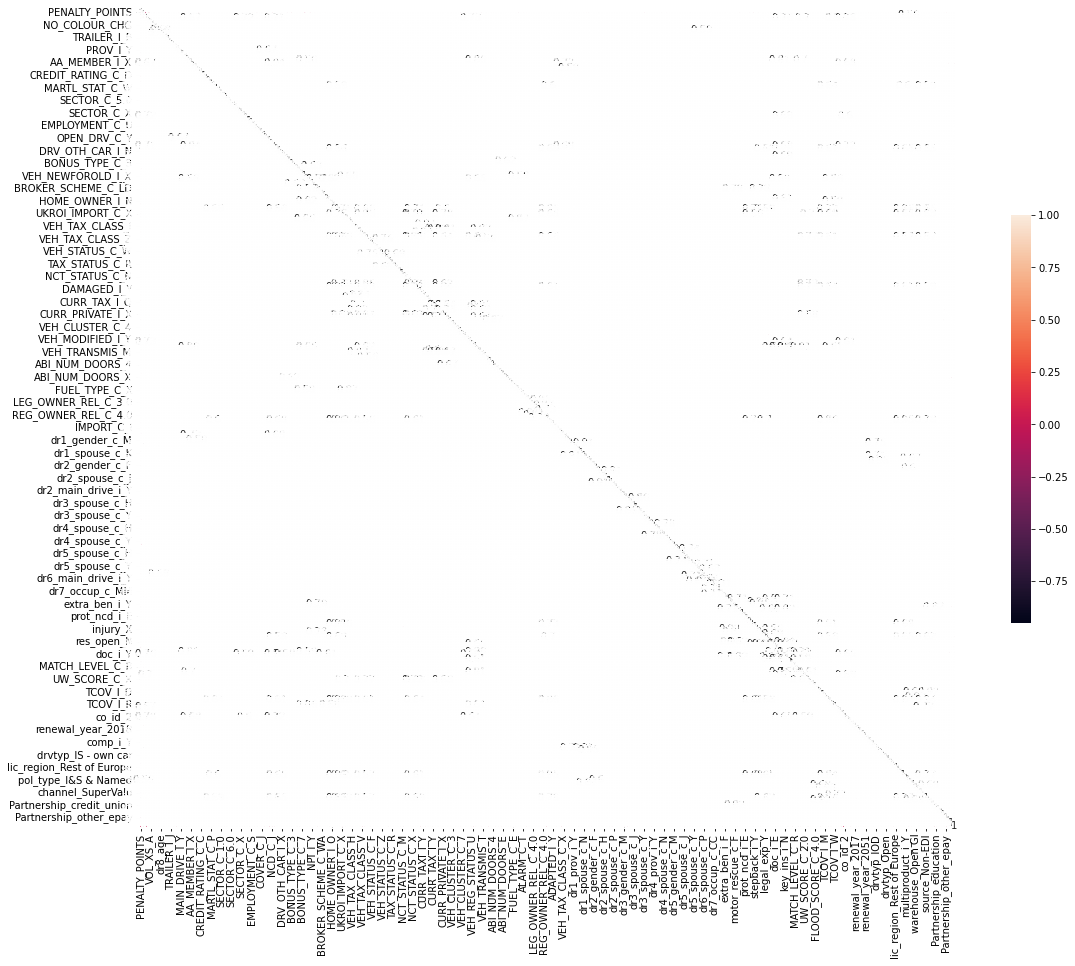

In [109]:
plt.subplots(figsize = (20,15))
sns.heatmap(correlation_mat, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Have a final report of the dataset using Sweetviz

In [110]:
#my_final_report = sv.analyze(dffinal, pairwise_analysis = 'on')

In [111]:
#my_final_report.show_html()

In [112]:
#profile = ProfileReport(dffinal, title="Pandas Profiling Report", explorative=True, correlations={
       #"pearson": {"calculate": True},
        #"spearman": {"calculate": False},
        #"kendall": {"calculate": False},
        #"phi_k": {"calculate": False},
        #"cramers": {"calculate": False},
    #},
#)

In [113]:
#profile.to_file("final_report.html")

### Save the clean dataset in a csv file

In [115]:
dffinal.to_csv(r'sample_sales_car_clean.csv')